In [2]:
import pandas as pd
df = pd.read_csv('../../data/geo/geo.csv')
df

,ID,Name,Municipality,Province,Instrument,Units,Lat,Lng,Elevation
0,TOS11000114,Abbadia S. S. - Laghetto Verde,Abbadia S.S.,SI,anemometer,deg,42.883103,11.661623,910.0
1,TOS11000114,Abbadia S. S. - Laghetto Verde,Abbadia S.S.,SI,anemometer,m/s,42.883103,11.661623,910.0
2,TOS11000114,Abbadia S. S. - Laghetto Verde3,Abbadia S.S.,SI,anemometer,m/s,42.883103,11.661623,910.0
3,TOS11000114,Abbadia S. S. - Laghetto Verde,Abbadia S.S.,SI,hygrometer,%,42.883103,11.661623,910.0
4,TOS11000114,Abbadia S. S. - Laghetto Verde,Abbadia S.S.,SI,snow meter,m,42.883103,11.661623,910.0
...,...,...,...,...,...,...,...,...,...
198,TOS03002761,Sovicille,Sovicille,SI,rain gauge,mm,43.276294,11.229860,260.0
199,TOS01000581,Stia,Pratovecchio Stia,AR,rain gauge,mm,43.801781,11.717606,537.0
200,TOS01000581,Stia,Pratovecchio Stia,AR,rain gauge,mm,43.801781,11.717606,537.0
201,TOS02000339,Tereglio,Coreglia Antelminelli,LU,rain gauge,mm,44.059846,10.567786,590.0


In [32]:
auser = ['TOS02000299','TOS02004271','TOS11000020','TOS01001889','TOS02004284',
         'TOS02004315','TOS02004195','TOS02000372','TOS02000339','TOS02000332',
         'TOS11000109','TOS02000512','TOS02004291']

luco = ['TOS01001379','TOS19000681','TOS01002661','TOS03001385','TOS03002733',
        'TOS03002742','TOS03002761','TOS03005707','TOS11000025','TOS11000080',
        'TOS11000082']

amiata = ['TOS03002901','TOS07000001','TOS11000052','TOS11000114','TOS11000115',
          'TOS20000003','TOS20000004','TOS29000055']

bilancino = ['TOS01000925','TOS01000921','TOS01000961','TOS01000911','TOS01000926']

arno = ['TOS01004659','TOS01000926','TOS01000911','TOS01000961','TOS01000921',
        'TOS01000925','TOS01001171','TOS01000581','TOS01001041','TOS01000891',
        'TOS01004571','TOS01000741','TOS01000799','TOS01000626','TOS01000611',
        'TOS11000111']

dfa = df[df['ID'].isin(arno)]

In [33]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas

In [34]:
dfaus = dfa.drop_duplicates('ID')
# Monte Serra - Rainfall, Temperature - 98, 100
# Orentano - Rainfall, Temperature
# Piaggione - Rainfall, Hydrometry
# Gallicano - Rainfall
# Pontetetto - Rainfall
# Borgo_a_Mozzano - Rainfall
# Calavorno - Rainfall
# Croce Arcana - Rainfall
# Tereglio Coreglia Antelminelli - Rainfall
# Fabbriche di Vallico - Rainfall
# Ponte a Moriano - Temperature
# Lucca Orto Botanico - Temperature
# Monte S Quirico - Hydrometry

In [35]:
dfaus

,ID,Name,Municipality,Province,Instrument,Units,Lat,Lng,Elevation
19,TOS01000626,Bibbiena,Bibbiena,AR,rain gauge,mm,43.714149,11.830949,415.00
29,TOS01000611,Camaldoli,Poppi,AR,rain gauge,mm,43.810416,11.817376,1111.00
39,TOS01000911,Cavallina,Barberino di Mugello,FI,rain gauge,mm,43.983567,11.237420,256.00
40,TOS01001041,Consuma,Rufina,FI,hygrometer,%,43.784466,11.585201,955.00
52,TOS11000111,Firenze Citta',Firenze,FI,anemometer,deg,43.771512,11.264566,48.00
59,TOS01000891,Il Palagio,Figline e Incisa Valdarno,FI,rain gauge,mm,43.612661,11.427217,315.00
60,TOS01000799,Laterina,Laterina Pergine Valdarno,AR,rain gauge,mm,43.508954,11.716307,210.00
61,TOS01000926,Le Croci (Barberino),Barberino di Mugello,FI,anemometer,deg,44.007030,11.271254,388.00
73,TOS01000921,Mangona,Barberino di Mugello,FI,hygrometer,%,44.050061,11.195636,540.00
78,TOS01000925,Marcoiano,Scarperia e San Piero,FI,hygrometer,%,44.054421,11.304825,537.51


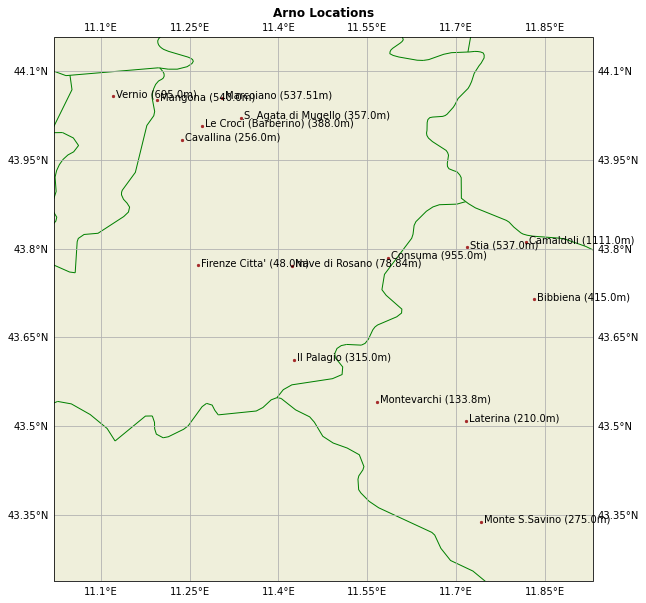

In [36]:
import cartopy.feature as cfeat
from cartopy.io import shapereader

c = 0.1
minLat = dfaus['Lat'].min() - c
minLng = dfaus['Lng'].min() - c
maxLat = dfaus['Lat'].max() + c
maxLng = dfaus['Lng'].max() + c
midLat = (maxLat + minLat) / 2
midLng = (maxLng + minLng) / 2
bbox = (minLng, maxLng, minLat, maxLat)

plt.figure(figsize=(10,10))
crs = ccrs.PlateCarree()
ax = plt.axes(projection=crs)
ax.set_extent(bbox, crs=crs)
ax.gridlines(draw_labels=True)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.LAND)
ax.add_feature(cfeat.LAKES)
ax.add_feature(cfeat.RIVERS)
ax.add_feature(cfeat.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none',
    edgecolor='green'
))
ax.scatter(
    dfaus['Lng'],
    dfaus['Lat'],
    s=5,
    c='brown'
)
for i, xy in enumerate(zip(dfaus['Lng'], dfaus['Lat'])):
    ax.annotate(f"{dfaus.iloc[i]['Name']} ({dfaus.iloc[i]['Elevation']}m)", xy=(xy[0] + 0.005,xy[1]))
ax.set_title('Arno Locations', fontweight='bold')
plt.savefig('river_geo.png')

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
ax

<GeoAxesSubplot:>